## Visualise trajectory
In this notebooks, the recorded trajectories are visualised

#### Setup

In [1]:
import numpy as np
import os
import json
import pathlib
from src.data import scene
from src.visualisation.observation_visualisation import display_sample
from IPython.display import clear_output
import time

/opt/conda/envs/habitat/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if pathlib.PurePath(os.getcwd()).name == 'notebooks':
    os.chdir('..')

In [3]:
with open('config/trajectories.json', 'r') as f:
    json_dict = json.load(f)

In [4]:
trajectory_to_visualise: int = 2
scene_info, actions = list(json_dict.items())[trajectory_to_visualise]
scene_split, scene_id = scene_info.split('/')

In [5]:
sim = scene.initialize_sim(scene_split, scene_id)
semantic_sensor_used = scene.check_if_semantic_sensor_used(sim)

### Epilepsy warning

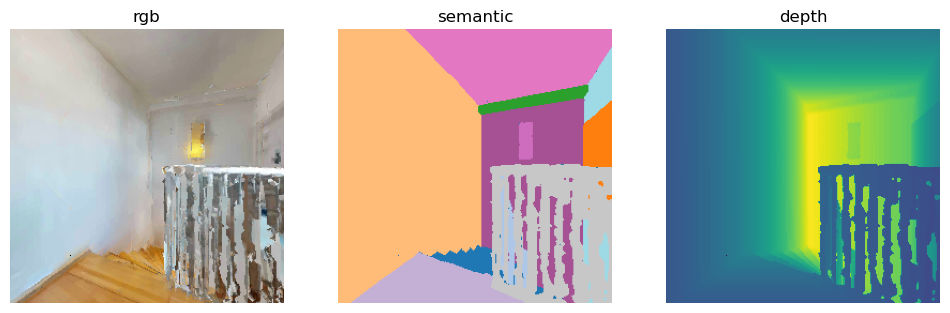

In [6]:
total_frames = 0

max_frames = len(actions)
observations = sim.step('move_forward')

while total_frames < max_frames:
    try:
        rgb = observations["color_sensor"]
        depth = observations["depth_sensor"]
        semantic = observations["semantic_sensor"] if semantic_sensor_used else np.array([])

        if display:
            display_sample(rgb, semantic_obs = semantic, depth_obs=depth)
            # If your notebook crashes, try increasing this
            time.sleep(0.1)
            clear_output(wait=True)

        observations = sim.step(actions[total_frames])
        total_frames += 1
    except KeyboardInterrupt:
        break